In [23]:
from jyrobot.world import World
from jyrobot import config
from jyrobot.canvas import Canvas
import math

from ipylab import JupyterFrontEnd, Panel
from ipywidgets import Layout

In [60]:
def get_canvas(config, scale=1.0):
    orig_width = config.get("width", 1000)
    orig_height = config.get("height", round(orig_width/2))

    config["width"] = round(orig_width * scale)
    config["height"] = round(orig_height * scale)

    canvas = Canvas(config["width"], config["height"])
    canvas.gc.scale(scale, scale)
    return canvas

In [61]:
canvas = get_canvas(config, 1.75)

In [62]:
app = JupyterFrontEnd()

panel = Panel()
panel.children = [canvas.gc]
panel.title.label = "Jyrobot Simulator" 
canvas.gc.layout = Layout(width='%spx' % config["width"])

app.shell.add(panel, 'main', {'mode': 'split-right'})

In [63]:
world = World(config, canvas)

In [68]:
world.reset()

In [69]:
world.robots[0].vx = -5
world.robots[0].va = math.pi/10

In [70]:
world.update(move=False)
world.draw()

In [71]:
%%time
world.run(2.0, lambda w: print(w.robots[0].stalled))

False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
CPU times: user 3.08 s, sys: 16.6 ms, total: 3.09 s
Wall time: 3.08 s


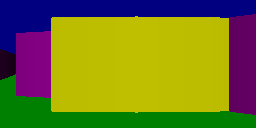

In [8]:
world.robots[0].cameras[0].takePicture()

In [15]:
world.robots[0].cameras[0].cameraShape = [500, 250]
world.robots[0].cameras[0].camera = [0 for i in range(500)]
world.robots[0].cameras[0].robotHits = [None for i in range(500)]

In [73]:
canvas.resetScale()

In [74]:
canvas.scale(2, 2)

In [75]:
canvas.gc.height = 500
canvas.gc.width = 1000